<a href="https://colab.research.google.com/github/ElizavetaKondratenko/MachinLearning/blob/main/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашняя работа 5. 
![](https://newapplift-production.s3.amazonaws.com/comfy/cms/files/files/000/001/201/original/machine-learning-robots-dilbert.gif)

Результат домашней работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму. Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, нам необходима ссылка на источник).

## Данные


В этой домашней работе мы научимся обучать модели машинного обучения, корректно ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий превысит ли средний заработок человека порог $50k. Каждый объект выборки — человек, для которого известны следующие признаки:
 - age
 - workclass
 - fnlwgt
 - education
 - education-num
 - marital-status
 - occupation
 - relationship
 - race
 - sex
 - capital-gain
 - capital-loss
 - hours-per-week
 
Более подробно про признаки можно почитать [здесь](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Целевой признак записан в переменной *>50K,<=50K*.

## Метрика качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучение (train) и контроль (test). Выбор пропорции разбиения — компромисс. Действительно, большой размер обучения ведет к более качественным алгоритмам, но бОльшему шуму в оценке модели на контроле. И наоборот, большой размер контрольной выборки ведет к менее шумной оценке качества, однако модели получаются менее точными.

Многие модели классификации получают оценку принадлежности положительному классу $\tilde{y}(x) \in R$ (например, вероятность принадлежности классу 1). Затем принимают решение о классе объекта путем сравнения оценки с некоторым порогом $\theta$:

$y(x) = +1$,  если $\tilde{y}(x) \geq \theta$, $y(x) = -1$, если $\tilde{y}(x) < \theta$

В этом случае можно рассматривать метрики, которые умеют работать с исходным ответом классификатора. В задании мы будем работать с метрикой AUC-ROC. Детального понимания принципов работы метрики AUC-ROC для выполнения лабораторной не требуется.

## Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели или структура решающего дерева), в то время как гиперпараметры задаются заранее (например, регуляризация в линейной модели или максимальная глубина решающего дерева). Каждая модель обычно имеет множество гиперпараметров, и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения метрики, которая оптимизируется). Однако в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку. Есть несколько схем, как это можно реализовать: 

 - Разбить имеющуюся выборку на обучающую и тестовую. В этом случае сравнение большого числа моделей при переборе параметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.
 - Для устранения описанной выше проблемы, можно разбить данные на 3 непересекающихся подвыборки: обучение (`train`), валидация (`validation`) и контроль (`test`). Валидационную подвыборку используют для сравнения моделей, а `test` — для окончательной оценки качества и сравнения семейств моделей с подобранными параметрами.
 - Другой способ сравнения моделей — [кросс-валидация](http://en.wikipedia.org/wiki/Cross-validation_(statistics). Существуют различные схемы кросс-валидации:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов: 
  - сетку можно делать более разреженной, перебирая меньше значений каждого параметра; однако, надо не забывать, что в таком случае можно пропустить хорошую комбинацию параметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества кросс-валидации становится более шумной и увеличивается риск выбрать неоптимальный набор параметров из-за случайности разбиения;
  - параметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации параметров, а небольшое число случайно выбранных.

## Задание

Прежде чем приступать к заданию, рекомендуем в начале прочитать его до конца.

Загрузите набор данных *data.adult.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate as cv
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from scaler import 

In [ ]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('data.adult.csv')
data.head()

Saving data.adult.csv to data.adult.csv


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


Иногда в данных встречаются пропуски. Как задаются пропуски обычно либо прописывается в описании к данным, либо просто на месте пропуска после чтения данных оказывается значение numpy.nan. Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

В данном датасете пропущенные значения обозначены как "?". 

**(0.5 балла)** Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.

In [ ]:
data.replace('?', np.nan)
data.dropna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,25,Local-gov,514716,Bachelors,13,Never-married,Adm-clerical,Own-child,Black,Female,0,0,40,<=50K
16276,32,Private,207668,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,45,>50K
16277,27,Private,104457,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,Male,0,0,40,<=50K
16278,59,State-gov,268700,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,<=50K


Обычно после загрузки датасета всегда необходима его некоторая предобработка. В данном случае она будет заключаться в следующем: 

 - Выделите целевую переменную (ту, которую мы хотим предсказывать) в отдельную переменную, удалите ее из датасета и преобразуйте к бинарному формату.
 - Обратите внимание, что не все признаки являются вещественными (числовыми). В начале мы будем работать только с вещественными признаками. Выделите их отдельно.

In [ ]:
X_numb = data.copy()
cols = ['>50K,<=50K', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
X_numb.drop(cols, inplace=True, axis =1)

y = data['>50K,<=50K']
def change(k):
    if k == '>50K':
        return 1
    else:
        return 0

y = y.apply(change)

## Обучение классификаторов на вещественных признаках

В данном разделе необходимо будет работать только с вещественными признаками и целевой переменной.

В начале посмотрим как работает подбор параметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 4 алгоритма:
 - [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
 - [SGD Linear Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

Для начала у первых трёх алгоритмов выберем один гиперпараметр, который будем оптимизировать:
 - kNN — число соседей (*n_neighbors*)
 - DecisonTree — глубина дерева (*max_depth*)
 - SGD Linear Classifier — оптимизируемая функция (*loss*)
 
Остальные параметры оставляйте в значениях по умолчанию. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). В качестве схемы кросс-валидации используйте 5-fold cv, которую можно задать с помощью класса [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

**(1.5 балла)** Для каждого алгоритма подберите оптимальные значения указанных гиперпараметров. Постройте график среднего качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


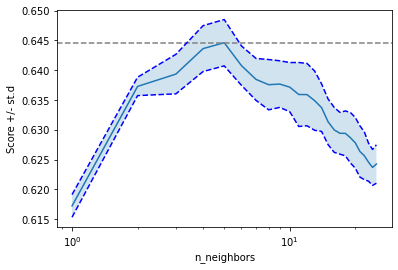

In [ ]:
n = range (1, 26, 1)
parametrs = {'n_neighbors': n}
algoritm = KNeighborsClassifier()
grid = GridSearchCV(algoritm, parametrs, cv=5, scoring='roc_auc')
grid_res_kNN = grid.fit(X_numb, y)
print(grid_res_kNN.best_estimator_)

res = grid_res_kNN.cv_results_['mean_test_score']
res_std = grid_res_kNN.cv_results_['std_test_score']

plt.semilogx(n, res)
plt.ylabel('Score +/- st.d')
plt.xlabel('n_neighbors')
plt.axhline(np.max(res), linestyle='--', color='.5')
std_error = res_std / np.sqrt(5)
plt.semilogx(n, res + std_error, 'b--')
plt.semilogx(n, res - std_error, 'b--')
plt.fill_between(n, res + std_error, res - std_error, alpha=0.2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='squared_hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


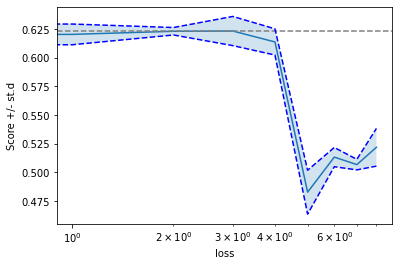

In [ ]:
loss = [ 'hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
parametrs = {'loss': loss}
algoritm = SGDClassifier()
grid = GridSearchCV(algoritm, parametrs, cv=5,  scoring='roc_auc')
grid_res_SGD = grid.fit(X_numb, y)
print(grid_res_SGD.best_estimator_)

res = grid_res_SGD.cv_results_['mean_test_score']
res_std = grid_res_SGD.cv_results_['std_test_score']

plt.semilogx(loss, res)
plt.ylabel('Score +/- st.d')
plt.xlabel('loss')
plt.axhline(np.max(res), linestyle='--', color='.5')
std_error = res_std / np.sqrt(5)
plt.semilogx(loss, res + std_error, 'b--')
plt.semilogx(loss, res - std_error, 'b--')
plt.fill_between(loss, res + std_error, res - std_error, alpha=0.2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


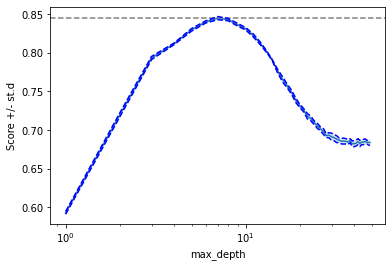

In [ ]:
depeth = range (1, 50, 1)
parametrs = {'max_depth': depeth}
algoritm = DecisionTreeClassifier()
grid = GridSearchCV(algoritm, parametrs, cv=5,  scoring='roc_auc')
grid_res_DT = grid.fit(X_numb, y)
print(grid_res_DT.best_estimator_)

res = grid_res_DT.cv_results_['mean_test_score']
res_std = grid_res_DT.cv_results_['std_test_score']

plt.semilogx(depeth, res)
plt.ylabel('Score +/- st.d')
plt.xlabel('max_depth')
plt.axhline(np.max(res), linestyle='--', color='.5')
std_error = res_std / np.sqrt(5)
plt.semilogx(depeth, res + std_error, 'b--')
plt.semilogx(depeth, res - std_error, 'b--')
plt.fill_between(depeth, res + std_error, res - std_error, alpha=0.2)

***Что можно сказать о полученных графиках? *** Наилучшее качество получилось достичь при помощи метода DecisionTree. Вторым по качеству оказался метод kNN, однако его качество оказалось значительно ниже. На третем месте оказалась модель SGD, чье качество довольно близко к методу kNN. Однако модель SGD показывает неустойчивые по времени результаты - при разных запусках можно получить три разные функции потерь в качестве оптимальных. При этом существенное влияние на качество данного метода разные функции потерь не оказывают.

Что вы можете сказать о получившихся графиках?

**(1 балл)** Также подберём число деревьев (*n_estimators*) в алгоритме RandomForest. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев, так что при увеличении этого гиперпараметра его качество не будет становиться хуже. Поэтому подберите такое количество деревьев, при котором качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев. Обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества разных размеров, состоящие из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). В дальнейших экспериментах используйте это количество деревьев.

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=225,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


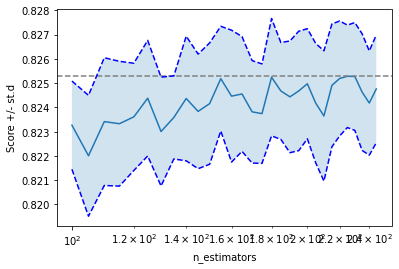

In [ ]:
n_est = range (100,250, 5)
parametrs = {'n_estimators': n_est}
algoritm = RandomForestClassifier()
grid = GridSearchCV(algoritm, parametrs, cv=5,  scoring='roc_auc')
grid_res_RF = grid.fit(X_numb, y)
print(grid_res_RF.best_estimator_)

res = grid_res_RF.cv_results_['mean_test_score']
res_std = grid_res_RF.cv_results_['std_test_score']

plt.semilogx(n_est, res)
plt.ylabel('Score +/- st.d')
plt.xlabel('n_estimators')
plt.axhline(np.max(res), linestyle='--', color='.5')
std_error = res_std / np.sqrt(5)
plt.semilogx(n_est, res + std_error, 'b--')
plt.semilogx(n_est, res - std_error, 'b--')
plt.fill_between(n_est, res + std_error, res - std_error, alpha=0.2)

При обучении алгоритмов стоит обращать внимание не только на качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это как-то могло повлиять на качество давайте посмотрим на сами признаки.

**(0.5 балла)** Постройте гистограммы для признаков *age*, *fnlwgt*, *capital-gain*.

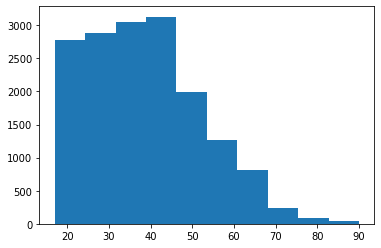

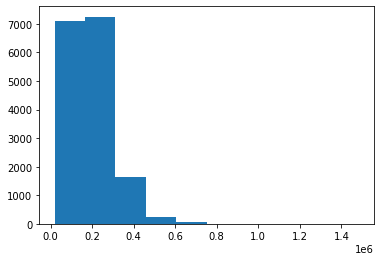

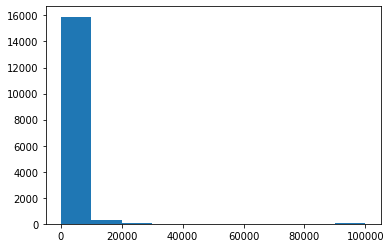

In [ ]:
plt.hist(data['age'])
plt.show()
plt.hist(data['fnlwgt'])
plt.show()
plt.hist(data['capital-gain'])
plt.show()

***Что можно сказать о переменных по полученным графикам?*** Каждая из переменных имеет уникальное распределение. Кроме того, единицы измерения у ни весьма сильно разняться - если одна из переменных измеряется в промежутке от 0 до 1.4, то другая достигает отметки 100000. Такеой сильно разнящийся масштаб оказывает существенное влияние на подбираемые коэффициенты в моделя. Именно поэтому имеет смысл отмасштабировать данные. 

**(0.5 балла)** Глядя на получившиеся графики в чем заключается особенность данных? На какие алгоритмы это может повлиять? Может ли масшитабирование повлиять на работу этих алгоритмов?

Масштабирование признаков можно выполнить, например, одним из следующих способов способами:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).
 
**(1 балл)** Масштабируйте все вещественные признаки одним из указанных способов и подберите оптимальные значения гиперпараметров аналогичо пункту выше.

In [ ]:
scaler = preprocessing.MinMaxScaler()
X_numb_scaled = scaler.fit_transform(X_numb)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=43, p=2,
                     weights='uniform')


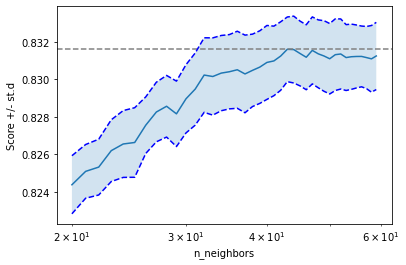

In [ ]:
n = range (20, 60, 1)
parametrs = {'n_neighbors': n}
algoritm = KNeighborsClassifier()
grid = GridSearchCV(algoritm, parametrs, cv=5, scoring='roc_auc')
grid_res_kNN_sc = grid.fit(X_numb_scaled, y)
print(grid_res_kNN_sc.best_estimator_)

res_knn = grid_res_kNN_sc.cv_results_['mean_test_score']
res_std = grid_res_kNN_sc.cv_results_['std_test_score']

plt.semilogx(n, res_knn)
plt.ylabel('Score +/- st.d')
plt.xlabel('n_neighbors')
plt.axhline(np.max(res_knn), linestyle='--', color='.5')
std_error = res_std / np.sqrt(5)
plt.semilogx(n, res_knn + std_error, 'b--')
plt.semilogx(n, res_knn - std_error, 'b--')
plt.fill_between(n, res_knn + std_error, res_knn - std_error, alpha=0.2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


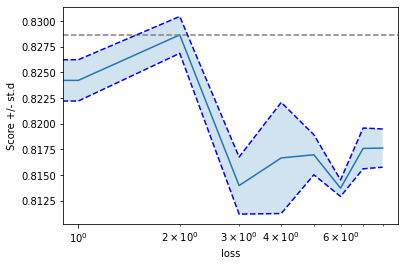

In [ ]:
loss = [ 'hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
parametrs = {'loss': loss}
algoritm = SGDClassifier()
grid = GridSearchCV(algoritm, parametrs, cv=5,  scoring='roc_auc')
grid_res_SGD_sc = grid.fit(X_numb_scaled, y)
print(grid_res_SGD_sc.best_estimator_)

res_SGD_2 = grid_res_SGD_sc.cv_results_['mean_test_score']
res_std = grid_res_SGD_sc.cv_results_['std_test_score']

plt.semilogx(loss, res_SGD_2)
plt.ylabel('Score +/- st.d')
plt.xlabel('loss')
plt.axhline(np.max(res_SGD_2), linestyle='--', color='.5')
std_error = res_std / np.sqrt(5)
plt.semilogx(loss, res_SGD_2 + std_error, 'b--')
plt.semilogx(loss, res_SGD_2 - std_error, 'b--')
plt.fill_between(loss, res_SGD_2 + std_error, res_SGD_2 - std_error, alpha=0.2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


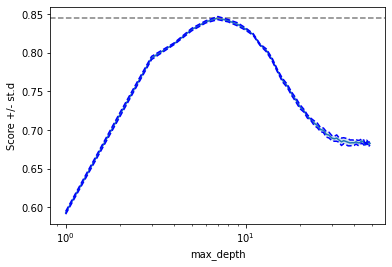

In [ ]:
depeth = range (1, 50, 1)
parametrs = {'max_depth': depeth}
algoritm = DecisionTreeClassifier()
grid = GridSearchCV(algoritm, parametrs, cv=5,  scoring='roc_auc')
grid_res_DT_sc = grid.fit(X_numb_scaled, y)
print(grid_res_DT_sc.best_estimator_)

res = grid_res_DT_sc.cv_results_['mean_test_score']
res_std = grid_res_DT_sc.cv_results_['std_test_score']

plt.semilogx(depeth, res)
plt.ylabel('Score +/- st.d')
plt.xlabel('max_depth')
plt.axhline(np.max(res), linestyle='--', color='.5')
std_error = res_std / np.sqrt(5)
plt.semilogx(depeth, res + std_error, 'b--')
plt.semilogx(depeth, res - std_error, 'b--')
plt.fill_between(depeth, res + std_error, res - std_error, alpha=0.2)

***Изменилось ли качество у некоторых алгоритмов?*** Использование масштабирования действительно значимо сумело повысить качество некоторых моделей - kNN и SGD. Помимо увеличения качества у моделей также изменились оптимальные значения параметров. Так же использование масштабирования помоголо выявить одназначно лучшую функцию потерь в моделе SGD.  При этом модель DecisionTree не изменилась - у неё сохранились как прежний уровень качесвта, так и оптимальный параметр. Однако последняя модель снова показывает лучшее качество среди трех вариантов. 

**(1,5 балла)** Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма в данном случае: 
 - KNN — число соседей (*n_neighbors*) и метрика (*metric*)
 - DecisonTree — глубина дерева (*max_depth*) и критерий разбиения (*criterion*)
 - RandomForest — критерий разбиения в деревьях (*criterion*) и *max_features* (при фиксированном количестве деревьев, найденном ранее)
 - SGDClassifier — оптимизируемая функция (*loss*) и *penalty*
 
Обратите внимание, что эта операция может быть ресурсо- и трудоемкой. Как оптимизировать подбор параметров по сетке сказано в разделе "Подбор гиперпараметров модели"

In [ ]:
n = range (1, 20, 1)
metric = [ 'euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis']
parametrs = {'n_neighbors': n, 'metric': metric}
algoritm = KNeighborsClassifier()
grid = GridSearchCV(algoritm, parametrs, cv=5, scoring='roc_auc')
grid_res_kNN_2 = grid.fit(X_numb_scaled, y)
print(grid_res_kNN_2.best_estimator_)

res = grid_res_kNN_2.cv_results_['mean_test_score']
res_time = grid_res_kNN_2.cv_results_['mean_fit_time']

In [ ]:
loss = [ 'hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
penalty = ['l2', 'l1', 'elasticnet']
parametrs = {'loss': loss, 'penalty': penalty }
algoritm = SGDClassifier()
grid = GridSearchCV(algoritm, parametrs, cv=5,  scoring='roc_auc')
grid_res_SGD_2 = grid.fit(X_numb_scaled, y)
print(grid_res_SGD_2.best_estimator_)

res_SGD = grid_res_SGD_2.cv_results_['mean_test_score']
res_std = grid_res_SGD_2.cv_results_['std_test_score']
print(np.average(res))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
nan


In [ ]:
depeth = range (1, 50, 1)
criterion = ['gini', 'entropy']
parametrs = {'max_depth': depeth, 'criterion': criterion}
algoritm = DecisionTreeClassifier()
grid = GridSearchCV(algoritm, parametrs, cv=5,  scoring='roc_auc')
grid_res_DT_2 = grid.fit(X_numb_scaled, y)
print(grid_res_DT_2.best_estimator_)

res = grid_res_DT_2.cv_results_['mean_test_score']
res_std = grid_res_DT_2.cv_results_['std_test_score']
print(np.average(res))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.7360952594606426


In [ ]:
max_features =['auto', 'sqrt', 'log2']
parametrs = {'criterion': criterion, 'max_features': max_features}
algoritm = RandomForestClassifier(n_estimators=225)
grid = GridSearchCV(algoritm, parametrs, cv=5,  scoring='roc_auc')
grid_res_RF_2 = grid.fit(X_numb, y)
print(grid_res_RF_2.best_estimator_)

res = grid_res_RF_2.cv_results_['mean_test_score']
res_std = grid_res_RF_2.cv_results_['std_test_score']
print(np.average(res))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=225,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.8251479238240615


***Сравним полученные модели.*** Самым времезатратным алгоритмом является RandomFores (1 мин. и 48 с.). Это можно объяснить самой сутью данного метода - построение деревьев занимает весьма много времени (особенно при заданном нами n). Вместе с этим именно он показал наивысшее качество полученной модели. Вторым по времени оказался метод kNN (1 мин. и 21 с.). В то же время подобранные оптимальные параметры не позволили посчитать качество на tesr части, что не позволяет в должной мере оценить првильность предсказаний данного метода. Третим по скорости стал метод DecisionTree (36 с.). Его качество оказалось меньше, чем у первого метода. Наконец, быстрее всех справился метод SGD (21 с.). Его качество оказалось лучше, чем у модели DecisionTree, но чуть-чуть ниже, чем у RandomFores. 

Какой из алгоритмов имеет наилучшее качество? 

**(0.5 балла)** Сравните алгоритмы с точки зрения времени обучения. Обучение какого из алгоритмов работает дольше всего и, как вы думаете, почему?

## Добавление категориальных признаков в модели

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков. 

**(0.5 балла)** Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) из sklearn).

In [ ]:
X_sex = pd.get_dummies(data['sex'], drop_first=True)
X_race = pd.get_dummies(data['race'], drop_first=True)
X_education = pd.get_dummies(data['education'], drop_first=True)
X_occupation = pd.get_dummies(data['occupation'], drop_first=True)
X_relationship = pd.get_dummies(data['relationship'], drop_first=True)

In [ ]:
X = X_sex.join((X_race, X_education,X_occupation, X_relationship, X_numb))

Так как после кодирования признаков получилось достаточно много, в этой работе мы не будем добавлять их и подбирать заново оптимальные гиперпараметры. 

**(0.5 балла)** Добавьте к масштабированным вещественным признакам закодированные категориальные и обучите алгоритмы с наилучшими гиперпараметрами из предыдущего пункта. Дало ли добавление новых признаков прирост качества? Измеряйте качество как и раньше используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

In [ ]:
res_kNN = cross_val_score(grid_res_kNN_2.best_estimator_, X, y, cv= 5, scoring='roc_auc')
res_SGD = cross_val_score(grid_res_SGD_2.best_estimator_, X, y, cv= 5, scoring='roc_auc')
res_RF = cross_val_score(grid_res_RF_2.best_estimator_, X, y, cv= 5, scoring='roc_auc')
res_DT = cross_val_score(grid_res_DT_2.best_estimator_, X, y, cv= 5, scoring='roc_auc')
print('res_kNN:', np.average(res_kNN))
print('res_SGD:', np.average(res_SGD))
print('res_RF:', np.average(res_RF))
print('res_DT:', np.average(res_DT))

res_kNN: 0.6361756194094361
res_SGD: 0.6292335467954411
res_RF: 0.8997726652720648
res_DT: 0.8799808889796029


***Что можно сказать про новые модели?*** Лучшим классификатором вновь оказался RandomForest, на втором месте по качеству - DecisionTree. Однако у обоих моделей хоть и чуть-чуть, но увеличилось качество при учета категориальных признаков. А значит можно сделать вывод о том, что введение дополнительных признаков было правильным.

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

## Смешивание моделей

Во всех предыдущих пунктах мы получили много сильных моделей, которые могут быть достаточно разными по своей природе (например, метод ближайших соседей и случайный лес). Часто на практике оказывается возможным увеличить качество предсказани путем смешивания подобных разных моделей. Давайте посмотрим, действительно ли это дает прирост в качестве.

Выберете из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

**(1 балл)** Подберите по сетке от 0 до 1 $\alpha$ для этого классификатора с помощью 5-Fold CV и постройте график качества в зависимости от $\alpha$ (аналогичный графику в разделе "Обучение классификаторов и оценка качества"). Дал ли этот подход прирост к качеству по сравнению с моделями ранее?

In [ ]:
from mlxtend.classifier import EnsembleVoteClassifier
wage_1 = range (0, 1, 0.1)
wage_2 = range (0, 1, 0.1)
wage_3 = range (0, 1, 0.1)
wage_4 = range (0, 1, 0.1)
weights=[wage_1,wage_2,wage_3,wage_4]
mv_clf= EnsembleVoteClassifier(clfs=[RandomForestClassifier(n_estimators=225), DecisionTreeClassifier(),SGDClassifier(),KNeighborsClassifier()])
parametrs = {'weights': weights}
grid = GridSearchCV(mv_clf, parametrs, cv=5,  scoring='roc_auc')
grid_res_ = grid.fit(X, y)
print(grid_res_RF_2.best_estimator_)

## Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей хотелось бы сравнить их между собой. Для этого можно построить "ящик с усами" (диаграму размаха). Для этого можно воспользоваться библиотекой [matplotlib](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html) или [seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

**(1 балл)** Для каждого типа классификатора (kNN, DecisionTree, RandomForest, SGD classifier), а так же смешанной модели выберете тот, которых давал наилучшее качество на кросс-валидации и постройте диаграмму размаха (все классификаторы должны быть изображены на одном графике).
 
Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

{'boxes': [<matplotlib.lines.Line2D at 0x7fa94e5195f8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa94e541048>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa94e541ac8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa94e541748>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa94e519908>,
  <matplotlib.lines.Line2D at 0x7fa950df9780>]}

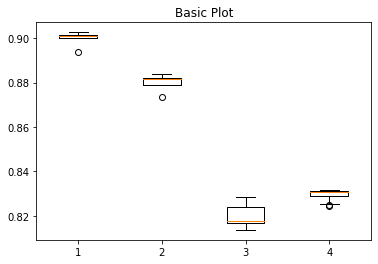

In [ ]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot((res_RF, res_DT, res_SGD_2, res_knn))

***Итоговые выводы. *** И так, что можно сказать о полученных моделях? Наилучший результат показал алгоритм RandomForest, хотя он же оказался самым времезатратным из всех. У алгоритма есть довольно много параметров, хотя практика показала, что изменение некоторых из них не сильно влияет на качество получаемой модели. Так что, с одной стороны, RandomForest позволяет уменьшить вред от потенциального переобучения, а с другой - нам приходится жертвовать временем обработки.
Второй по качеству оказалась алгоритм DecisionTree. Она чуть уступает по качеству предыдущей модели, однако занимает значительно меньшее количество времени. Изменение гиперпараметров не оказывает столь существенное влияние на данный алгоритм.
На третьем месте по качеству - алгоритм KNeighbors. У него относительно невысокое качество, и при подборе большого количесвта гиперпараметров приходится ждать довольно много времени. Однако интуитивно это самый простой и понятны алгоритм. 
Наконец, на последнем есте оказался алгоритм SGDClassifier. Он обладает наименьшим качеством среди полученных моделей. В то же время это весьма быстрый в работе алгоритм, который довольно сильно зависит от подбираемых гиперпараметров. 